In [20]:
# Create spiral matrix

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from einops import rearrange, repeat
from einops.layers.torch import Rearrange

def create_spiral(n):
    # Initialize a n x n matrix
    matrix = [[0] * n for _ in range(n)]

    x, y = 0, 0

    # Direction vectors (right, down, left, up)
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    direction = 0

    for i in range(n * n - 1, -1, -1):  # Start from n*n - 1 (35 for 6x6) and go down to 0
        matrix[x][y] = i

        nx = x + dx[direction]
        ny = y + dy[direction]

        # Change direction if next position is out of bounds or already filled
        if nx < 0 or nx >= n or ny < 0 or ny >= n or matrix[nx][ny] != 0:
            direction = (direction + 1) % 4  # Change direction
            nx = x + dx[direction]
            ny = y + dy[direction]

        x, y = nx, ny

    return matrix

spiral_matrix = create_spiral(8)
spiral_matrix

[[63, 62, 61, 60, 59, 58, 57, 56],
 [36, 35, 34, 33, 32, 31, 30, 55],
 [37, 16, 15, 14, 13, 12, 29, 54],
 [38, 17, 4, 3, 2, 11, 28, 53],
 [39, 18, 5, 0, 1, 10, 27, 52],
 [40, 19, 6, 7, 8, 9, 26, 51],
 [41, 20, 21, 22, 23, 24, 25, 50],
 [42, 43, 44, 45, 46, 47, 48, 49]]

In [23]:
# Use the spiral matrix to reorder the data tensor

data_tensor = torch.randint(0, 99, (8, 8))

spiral_indices = torch.tensor([
    [63, 62, 61, 60, 59, 58, 57, 56],
    [36, 35, 34, 33, 32, 31, 30, 55],
    [37, 16, 15, 14, 13, 12, 29, 54],
    [38, 17,  4,  3,  2, 11, 28, 53],
    [39, 18,  5,  0,  1, 10, 27, 52],
    [40, 19,  6,  7,  8,  9, 26, 51],
    [41, 20, 21, 22, 23, 24, 25, 50],
    [42, 43, 44, 45, 46, 47, 48, 49]
])


flattened_data = data_tensor.flatten()

correct_reordered_tensor = torch.zeros_like(flattened_data)

correct_reordered_tensor[spiral_indices.flatten()] = flattened_data

correct_reordered_tensor = correct_reordered_tensor.reshape(8, 8).flatten()
print(spiral_indices)
print(data_tensor)
correct_reordered_tensor


tensor([[63, 62, 61, 60, 59, 58, 57, 56],
        [36, 35, 34, 33, 32, 31, 30, 55],
        [37, 16, 15, 14, 13, 12, 29, 54],
        [38, 17,  4,  3,  2, 11, 28, 53],
        [39, 18,  5,  0,  1, 10, 27, 52],
        [40, 19,  6,  7,  8,  9, 26, 51],
        [41, 20, 21, 22, 23, 24, 25, 50],
        [42, 43, 44, 45, 46, 47, 48, 49]])
tensor([[64, 68,  0, 60,  0,  6, 62, 48],
        [49, 19,  1, 49, 85, 53,  7, 26],
        [28,  6, 64, 61, 92, 73, 37, 43],
        [94, 82, 53,  1, 68, 50, 62, 62],
        [43, 47, 36,  7, 84,  9, 94, 77],
        [73,  3, 65, 49,  2, 42, 54, 33],
        [41, 74, 74, 50, 91,  4, 60, 66],
        [53, 57, 49, 39, 12, 17, 95, 89]])


tensor([ 7, 84, 68,  1, 53, 36, 65, 49,  2, 42,  9, 50, 73, 92, 61, 64,  6, 82,
        47,  3, 74, 74, 50, 91,  4, 60, 54, 94, 62, 37,  7, 53, 85, 49,  1, 19,
        49, 28, 94, 43, 73, 41, 53, 57, 49, 39, 12, 17, 95, 89, 66, 33, 77, 62,
        43, 26, 48, 62,  6,  0, 60,  0, 68, 64])

In [25]:
# Use the spiral matrix to reorder the data tensor more efficiently
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from einops import rearrange, repeat
from einops.layers.torch import Rearrange

size = 7

spiral_indices = torch.tensor(create_spiral(7))
spiral_indices

data_tensor = torch.randint(0, 99, (size,size))

correct_reordered_tensor = torch.zeros_like(data_tensor.flatten())

correct_reordered_tensor[spiral_indices.flatten()] = data_tensor.flatten()

print(spiral_indices)
print(data_tensor)
correct_reordered_tensor


tensor([[48, 47, 46, 45, 44, 43, 42],
        [25, 24, 23, 22, 21, 20, 41],
        [26,  9,  8,  7,  6, 19, 40],
        [27, 10,  1,  0,  5, 18, 39],
        [28, 11,  2,  3,  4, 17, 38],
        [29, 12, 13, 14, 15, 16, 37],
        [30, 31, 32, 33, 34, 35, 36]])
tensor([[50, 58, 32, 62,  2,  5, 14],
        [78, 93, 33, 34, 73, 41, 84],
        [27, 37, 63, 92,  7,  2, 42],
        [63, 97, 48, 33, 71, 78, 38],
        [88, 71, 20, 66, 36, 56, 66],
        [30, 69, 79, 79, 37, 40, 79],
        [71, 85, 12, 74, 65, 55, 53]])


tensor([33, 48, 20, 66, 36, 71,  7, 92, 63, 37, 97, 71, 69, 79, 79, 37, 40, 56,
        78,  2, 41, 73, 34, 33, 93, 78, 27, 63, 88, 30, 71, 85, 12, 74, 65, 55,
        53, 79, 66, 38, 42, 84, 14,  5,  2, 62, 32, 58, 50])

In [1]:
# Use the spiral matrix to getData from an image

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from einops import rearrange, repeat
from einops.layers.torch import Rearrange

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

IMAGE_SIZE = 3
BLOCK_SIZE = IMAGE_SIZE * IMAGE_SIZE - 1
BATCH_SIZE = 0

transform = transforms.Compose(
    [
        transforms.RandomCrop(IMAGE_SIZE),
        transforms.ToTensor(),
    ]
)

def create_spiral(n):
    # Initialize a n x n matrix
    matrix = [[0] * n for _ in range(n)]

    x, y = 0, 0

    # Direction vectors (right, down, left, up)
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    direction = 0

    for i in range(n * n - 1, -1, -1):  # Start from n*n - 1 (35 for 6x6) and go down to 0
        matrix[x][y] = i

        nx = x + dx[direction]
        ny = y + dy[direction]

        # Change direction if next position is out of bounds or already filled
        if nx < 0 or nx >= n or ny < 0 or ny >= n or matrix[nx][ny] != 0:
            direction = (direction + 1) % 4  # Change direction
            nx = x + dx[direction]
            ny = y + dy[direction]

        x, y = nx, ny

    return matrix

spiral_indices = torch.tensor(create_spiral(IMAGE_SIZE))

@torch.no_grad()
def get_data(data):
    C ,H ,W = data.shape

    print(data.shape)
    print(data)

    spiral_data = torch.zeros_like(data.view(C, -1))
    print(spiral_data.shape)

    spiral_data[:,spiral_indices.flatten()] = data.view(C, -1)

    print(spiral_indices)

    print(spiral_data.shape)
    print(spiral_data)


    x = spiral_data[:, :BLOCK_SIZE]
    y = spiral_data[:, 1:BLOCK_SIZE+1]

    x, y = x.to(device), y.to(device)
    x = rearrange(x, 'c h -> h c')
    y = rearrange(y, 'c h -> h c')
    return x, y


with Image.open("gen_csgo.png") as img:
    img = transform(img)
    dataRaw = img[:3].to(device)

    x, y = get_data(dataRaw)

    print("x", x.shape)
    print(x)
    print("y", y.shape)
    print(y)



torch.Size([3, 3, 3])
tensor([[[0.9529, 0.9529, 0.9529],
         [0.9608, 0.9647, 0.9647],
         [0.9686, 0.9686, 0.9647]],

        [[0.8431, 0.8431, 0.8431],
         [0.8510, 0.8549, 0.8549],
         [0.8588, 0.8588, 0.8549]],

        [[0.7490, 0.7490, 0.7490],
         [0.7569, 0.7608, 0.7608],
         [0.7647, 0.7647, 0.7608]]])
torch.Size([3, 9])
tensor([[8, 7, 6],
        [1, 0, 5],
        [2, 3, 4]])
torch.Size([3, 9])
tensor([[0.9647, 0.9608, 0.9686, 0.9686, 0.9647, 0.9647, 0.9529, 0.9529, 0.9529],
        [0.8549, 0.8510, 0.8588, 0.8588, 0.8549, 0.8549, 0.8431, 0.8431, 0.8431],
        [0.7608, 0.7569, 0.7647, 0.7647, 0.7608, 0.7608, 0.7490, 0.7490, 0.7490]])
x torch.Size([8, 3])
tensor([[0.9647, 0.8549, 0.7608],
        [0.9608, 0.8510, 0.7569],
        [0.9686, 0.8588, 0.7647],
        [0.9686, 0.8588, 0.7647],
        [0.9647, 0.8549, 0.7608],
        [0.9647, 0.8549, 0.7608],
        [0.9529, 0.8431, 0.7490],
        [0.9529, 0.8431, 0.7490]])
y torch.Size([8, 3])

In [1]:
# convert back to image 1 Color channel

import torch

IMAGE_SIZE = 5

def create_spiral(n):
    # Initialize a n x n matrix
    matrix = [[0] * n for _ in range(n)]

    x, y = 0, 0

    # Direction vectors (right, down, left, up)
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    direction = 0

    for i in range(n * n - 1, -1, -1):  # Start from n*n - 1 (35 for 6x6) and go down to 0
        matrix[x][y] = i

        nx = x + dx[direction]
        ny = y + dy[direction]

        # Change direction if next position is out of bounds or already filled
        if nx < 0 or nx >= n or ny < 0 or ny >= n or matrix[nx][ny] != 0:
            direction = (direction + 1) % 4  # Change direction
            nx = x + dx[direction]
            ny = y + dy[direction]

        x, y = nx, ny

    return matrix

spiral_indices = torch.tensor(create_spiral(IMAGE_SIZE)).flatten()

# Erstellen des Beispiel-Daten-Tensors und des spiralförmigen Index-Tensors (erneut)
data_tensor = torch.arange(IMAGE_SIZE*IMAGE_SIZE).reshape(IMAGE_SIZE, IMAGE_SIZE) + 10

# Erstellen des umgeordneten Tensors
correct_reordered_tensor = torch.zeros_like(data_tensor.flatten())
correct_reordered_tensor[spiral_indices] = data_tensor.flatten()


positions_in_spiral = torch.argsort(spiral_indices)

reconstructed_tensor_efficient = torch.zeros_like(data_tensor).flatten()
reconstructed_tensor_efficient[positions_in_spiral] = correct_reordered_tensor

# Rückumwandlung in 8x8 Format
reconstructed_tensor_efficient = reconstructed_tensor_efficient.view(IMAGE_SIZE, IMAGE_SIZE)

print(data_tensor)
print(reconstructed_tensor_efficient)

tensor([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]])
tensor([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]])


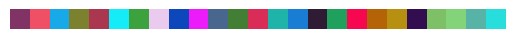

tensor([[[0.5050, 0.2038, 0.3948],
         [0.9407, 0.3153, 0.3985],
         [0.0979, 0.6657, 0.9175],
         [0.4840, 0.5062, 0.1831],
         [0.6696, 0.2132, 0.3158],
         [0.0860, 0.9279, 0.9758],
         [0.2378, 0.6363, 0.2438],
         [0.9242, 0.7957, 0.9378],
         [0.0497, 0.2837, 0.7400],
         [0.9288, 0.1126, 0.9831],
         [0.2838, 0.4038, 0.5586],
         [0.2642, 0.4961, 0.2088],
         [0.8510, 0.1731, 0.3435],
         [0.1241, 0.7069, 0.6697],
         [0.0998, 0.4911, 0.8293],
         [0.1859, 0.1069, 0.2074],
         [0.1248, 0.6302, 0.3682],
         [0.9691, 0.0310, 0.3165],
         [0.7082, 0.3893, 0.0292],
         [0.7239, 0.5672, 0.0691],
         [0.1969, 0.0565, 0.3172],
         [0.4920, 0.7544, 0.4033],
         [0.5146, 0.8323, 0.4717],
         [0.3401, 0.7028, 0.6494],
         [0.1572, 0.8731, 0.8656]]])
tensor([[[0.1572, 0.3401, 0.5146, 0.4920, 0.1969],
         [0.9288, 0.0497, 0.9242, 0.2378, 0.7239],
         [0.2838, 0.9

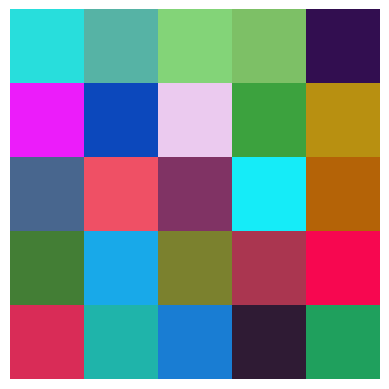

In [57]:
# convert back to image 3 colors
from einops import rearrange, repeat
from einops.layers.torch import Rearrange
import torch

IMAGE_SIZE = 5

def create_spiral(n):
    # Initialize a n x n matrix
    matrix = [[0] * n for _ in range(n)]

    x, y = 0, 0

    # Direction vectors (right, down, left, up)
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    direction = 0

    for i in range(n * n - 1, -1, -1):  # Start from n*n - 1 (35 for 6x6) and go down to 0
        matrix[x][y] = i

        nx = x + dx[direction]
        ny = y + dy[direction]

        # Change direction if next position is out of bounds or already filled
        if nx < 0 or nx >= n or ny < 0 or ny >= n or matrix[nx][ny] != 0:
            direction = (direction + 1) % 4  # Change direction
            nx = x + dx[direction]
            ny = y + dy[direction]

        x, y = nx, ny

    return matrix

spiral_indices = torch.tensor(create_spiral(IMAGE_SIZE)).flatten()

# Erstellen des Beispiel-Daten-Tensors und des spiralförmigen Index-Tensors (erneut)
data_tensor = torch.rand((1,IMAGE_SIZE*IMAGE_SIZE,3))

positions_in_spiral = torch.argsort(spiral_indices)

reconstructed_tensor_efficient = torch.zeros((3,IMAGE_SIZE*IMAGE_SIZE))
reconstructed_tensor_efficient[:,positions_in_spiral] = rearrange(data_tensor, '1 h c -> c h')

# Rückumwandlung in 8x8 Format
reconstructed_tensor_efficient = reconstructed_tensor_efficient.view(3,IMAGE_SIZE, IMAGE_SIZE)

plt.imshow(data_tensor)
plt.axis('off')
plt.show()

print(data_tensor)
print(reconstructed_tensor_efficient)

plt.imshow(rearrange(reconstructed_tensor_efficient, 'c h w -> h w c'))
plt.axis('off')
plt.show()

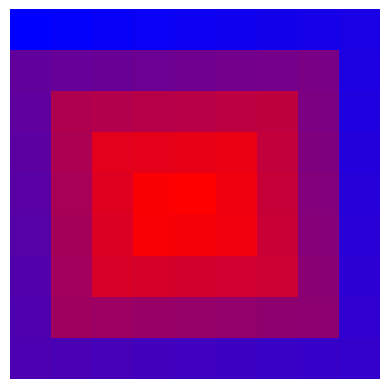

In [62]:
# Create expample image to explain the spiral matrix concept

from einops import rearrange, repeat
from einops.layers.torch import Rearrange

size = 9

def create_spiral(n):
    # Initialize a n x n matrix
    matrix = [[0] * n for _ in range(n)]

    x, y = 0, 0

    # Direction vectors (right, down, left, up)
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    direction = 0

    for i in range(n * n - 1, -1, -1):  # Start from n*n - 1 (35 for 6x6) and go down to 0
        matrix[x][y] = i

        nx = x + dx[direction]
        ny = y + dy[direction]

        # Change direction if next position is out of bounds or already filled
        if nx < 0 or nx >= n or ny < 0 or ny >= n or matrix[nx][ny] != 0:
            direction = (direction + 1) % 4  # Change direction
            nx = x + dx[direction]
            ny = y + dy[direction]

        x, y = nx, ny

    return matrix

def generate_color_gradient(length):
    # Generate a gradient for each color channel
    r = np.linspace(1, 0, length)
    g = np.linspace(0, 0, length)  # Green channel remains constant at 0
    b = np.linspace(0, 1, length)  # Blue channel increases from 0 to 1

    # Stack the color channels to form the gradient
    gradient = np.stack((r, g, b), axis=1)

    return gradient


spiral_indices = torch.tensor(create_spiral(size)).flatten()

gradient_tensor = generate_color_gradient(size*size)

gradient_tensor_reshaped = gradient_tensor[np.newaxis, :, :]

# Plotting the color gradient
plt.imshow(gradient_tensor_reshaped)
plt.axis('off')
plt.show()


gradient_tensor_reshaped_tensor = torch.tensor(gradient_tensor_reshaped).float()
positions_in_spiral = torch.argsort(spiral_indices)

reconstructed_tensor_efficient = torch.zeros((3,size*size))
reconstructed_tensor_efficient[:,positions_in_spiral] = rearrange(gradient_tensor_reshaped_tensor, '1 h c -> c h')

# Rückumwandlung in 8x8 Format
reconstructed_tensor_efficient = reconstructed_tensor_efficient.view(3,size, size)


plt.imshow(rearrange(reconstructed_tensor_efficient, 'c h w -> h w c'))
plt.axis('off')
plt.show()

